<a href="https://colab.research.google.com/github/TruongThanhNhan20146382/Nhan20146382/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [65]:
trainset='/content/drive/MyDrive/AI_bt/face'

In [66]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 231 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [67]:
{'.ipynb_checkpoints': 0,
 'Duong': 1,
 'Nhan': 2,
 'Quang': 3}

{'.ipynb_checkpoints': 0, 'Duong': 1, 'Nhan': 2, 'Quang': 3}

In [68]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [83]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=40,verbose=1,validation_data=validation_set)

Epoch 1/40
2/2 [==============================] - 23s 10s/step - loss: 0.0130 - accuracy: 0.9913 - val_loss: 1.2616e-06 - val_accuracy: 1.0000
Epoch 2/40
2/2 [==============================] - 17s 9s/step - loss: 0.0224 - accuracy: 0.9913 - val_loss: 4.3710e-07 - val_accuracy: 1.0000
Epoch 3/40
2/2 [==============================] - 17s 11s/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 2.8711e-04 - val_accuracy: 1.0000
Epoch 4/40
2/2 [==============================] - 16s 9s/step - loss: 8.8487e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/40
2/2 [==============================] - 17s 10s/step - loss: 0.1276 - accuracy: 0.9870 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 6/40
2/2 [==============================] - 16s 9s/step - loss: 0.0341 - accuracy: 0.9957 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 7/40
2/2 [==============================] - 17s 10s/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 8/40
2/2

In [84]:
model.save('face.hs')

In [85]:
model4=load_model('face.hs')

In [86]:
label = ['Duong', 'Nhan', 'Quang']

1/1 [==============================] - 0s 135ms/step
Nhan


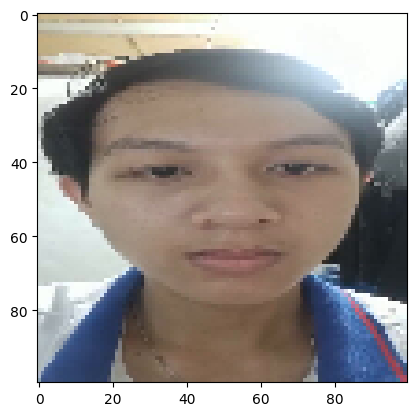

In [87]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_bt/test/face/face_007.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 41ms/step
Duong


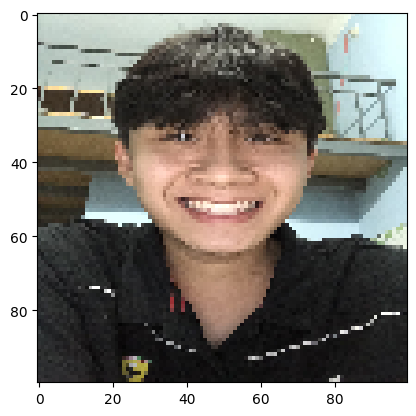

In [88]:
img = load_img('/content/drive/MyDrive/AI_bt/test/face/Duong9.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 38ms/step
Quang


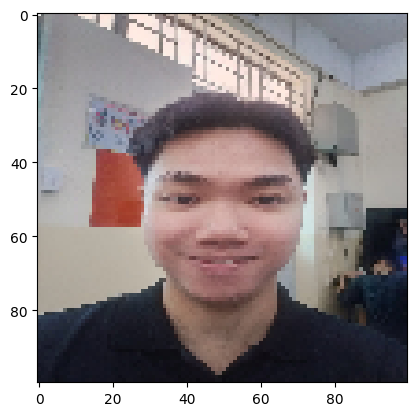

In [89]:
img = load_img('/content/drive/MyDrive/AI_bt/test/face/Quang.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])